In [1]:
import numpy as np
import pandas as pd

In [2]:
titanic_df = pd.read_csv('train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [12]:
%matplotlib inline

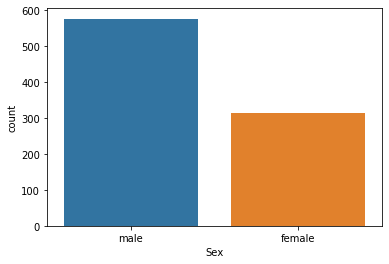

In [15]:
sns.countplot('Sex',data = titanic_df) #sns.factorplot('Sex',data = titanic_df) was not working because its in the old versions

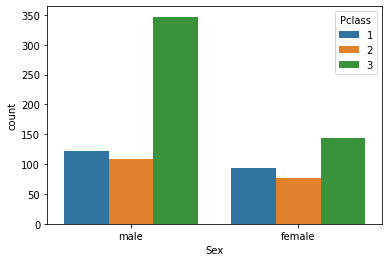

In [16]:
sns.countplot('Sex',data = titanic_df,hue = 'Pclass' ) 

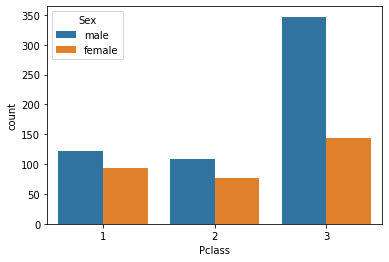

In [17]:
sns.countplot('Pclass',data = titanic_df,hue = 'Sex' ) 

In [18]:
def male_female_child(passenger):
    Age , Sex = passenger
    if(Age < 16):
        return 'Child'
    else:
        return Sex
    

In [20]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [22]:
titanic_df['person'].unique()

array(['male', 'female', 'Child'], dtype=object)

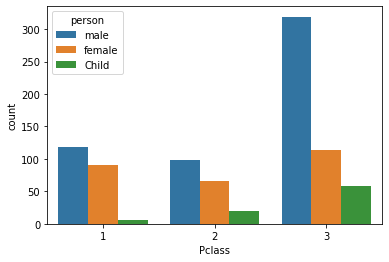

In [24]:
sns.countplot('Pclass',data = titanic_df , hue='person')

(array([14., 10.,  6., 10.,  7.,  3.,  4.,  8.,  2.,  4.,  1.,  8.,  6.,
        17., 13., 26., 25., 16., 51., 15., 31., 24., 18., 18., 27., 20.,
        44., 18., 17., 16., 18., 23.,  6., 25., 13.,  8., 13.,  5.,  9.,
        14., 12.,  9.,  6., 10.,  7.,  6.,  1.,  8.,  7.,  2.,  5.,  2.,
         4.,  3.,  4.,  4.,  3.,  1.,  0.,  0.,  0.,  3.,  2.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.]),
 array([ 0.42      ,  1.55685714,  2.69371429,  3.83057143,  4.96742857,
         6.10428571,  7.24114286,  8.378     ,  9.51485714, 10.65171429,
        11.78857143, 12.92542857, 14.06228571, 15.19914286, 16.336     ,
        17.47285714, 18.60971429, 19.74657143, 20.88342857, 22.02028571,
        23.15714286, 24.294     , 25.43085714, 26.56771429, 27.70457143,
        28.84142857, 29.97828571, 31.11514286, 32.252     , 33.38885714,
        34.52571429, 35.66257143, 36.79942857, 37.93628571, 39.07314286,
        40.21      , 41.34685714, 42.48371429, 43.62057143, 44.75742857,
        45.89428

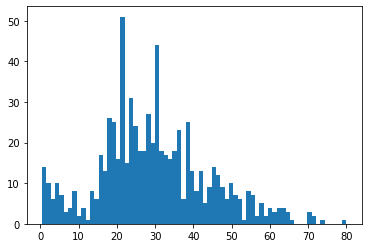

In [33]:
plt.hist(titanic_df['Age'] , bins=70)

In [26]:
titanic_df['Age'].mean() # the average of ages on titanic

29.69911764705882

In [27]:
titanic_df['person'].value_counts()

male      537
female    271
Child      83
Name: person, dtype: int64

In [34]:
titanic_df['Age'].max()

80.0

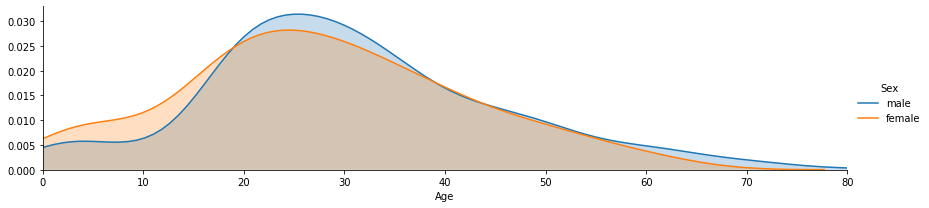

In [37]:
fig = sns.FacetGrid(titanic_df , hue='Sex' ,aspect = 4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

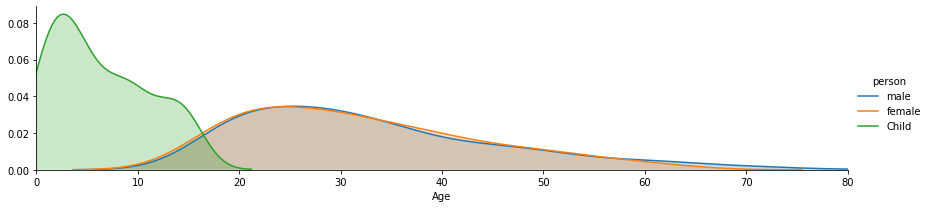

In [38]:
fig = sns.FacetGrid(titanic_df , hue='person' ,aspect = 4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

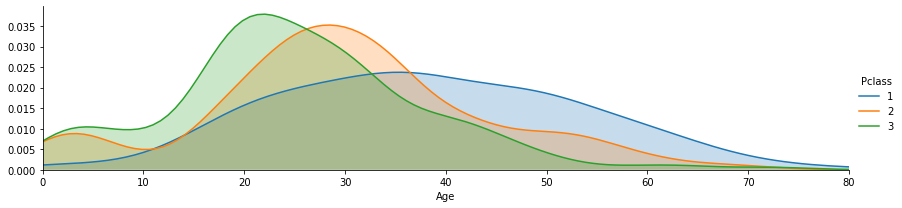

In [39]:
#age distripution over the classes
fig = sns.FacetGrid(titanic_df , hue='Pclass' ,aspect = 4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

In [40]:
deck = titanic_df['Cabin'].dropna()

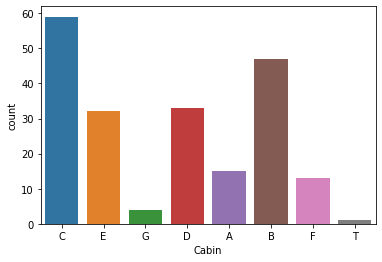

In [47]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin'] #this is used to rename the col headingg
sns.countplot('Cabin',data = cabin_df)

In [50]:
cabin_df  = cabin_df[cabin_df['Cabin'] != 'T']

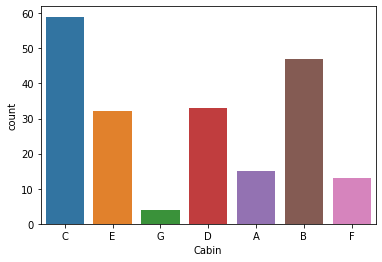

In [53]:
sns.countplot('Cabin',data = cabin_df)

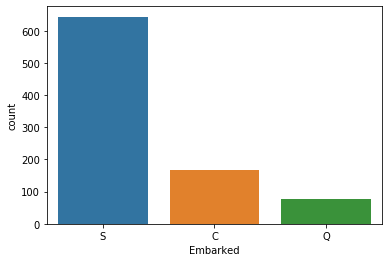

In [54]:
sns.countplot('Embarked',data = titanic_df)

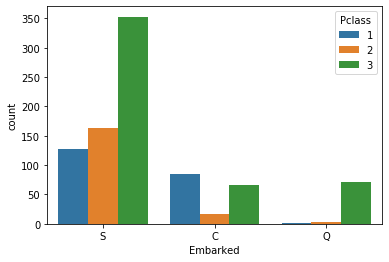

In [57]:
sns.countplot('Embarked',data = titanic_df,hue='Pclass') #lets see what city was at a good finanical income

In [80]:
titanic_df['Alone']  =titanic_df['SibSp']+titanic_df['Parch']


In [81]:
titanic_df['Alone'].loc[titanic_df['Alone'] != 0 ] = 'with family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0 ] = "Alone"


C:\Users\mohamedhassan\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [82]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,with family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone


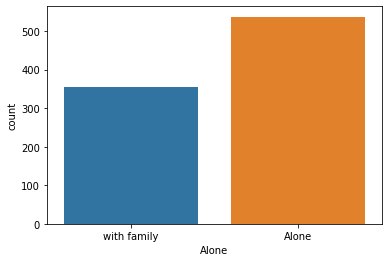

In [84]:
sns.countplot('Alone',data = titanic_df)

In [85]:
titanic_df['Survivor'] = titanic_df['Survived'].map({0:'no',1:'yes'})

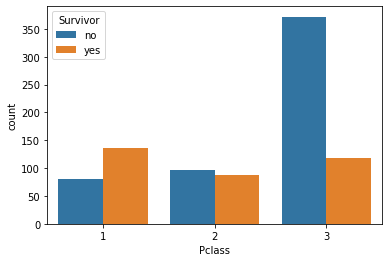

In [99]:
sns.countplot('Pclass',data=titanic_df , hue = 'Survivor')

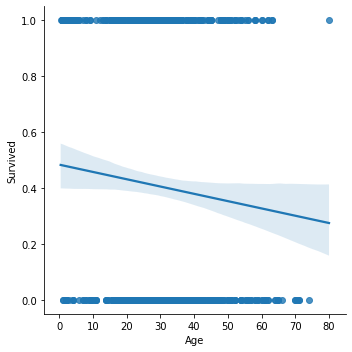

In [103]:
sns.lmplot('Age','Survived' , data = titanic_df) #age factor

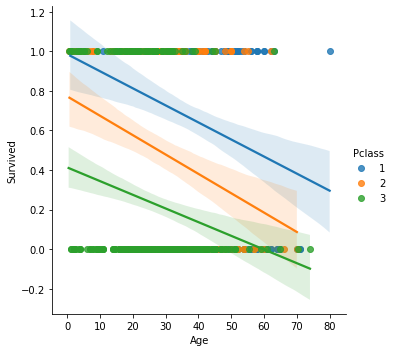

In [105]:
#age and class effect on being a survior or not
sns.lmplot('Age','Survived' ,hue='Pclass', data = titanic_df)